In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
url = r'/content/TSLA train.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [38]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-04-2015,188.699997,192.300003,186.050003,187.589996,187.589996,3794600
1,02-04-2015,190.229996,193.229996,190.000000,191.000000,191.000000,5010400
2,06-04-2015,198.000000,207.750000,197.500000,203.100006,203.100006,12455800
3,07-04-2015,202.509995,205.059998,201.139999,203.250000,203.250000,4347900
4,08-04-2015,208.199997,210.899994,205.869995,207.669998,207.669998,6303100


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
y_train = []
for i in range(60, 896):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Dense

In [42]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=25,batch_size=100)

Epoch 1/25
9/9 [==============================] - 1s 156ms/step - loss: 0.0154
Epoch 2/25
9/9 [==============================] - 1s 157ms/step - loss: 0.0078
Epoch 3/25
9/9 [==============================] - 1s 155ms/step - loss: 0.0062
Epoch 4/25
9/9 [==============================] - 1s 154ms/step - loss: 0.0055
Epoch 5/25
9/9 [==============================] - 1s 155ms/step - loss: 0.0046
Epoch 6/25
9/9 [==============================] - 1s 158ms/step - loss: 0.0048
Epoch 7/25
9/9 [==============================] - 1s 158ms/step - loss: 0.0038
Epoch 8/25
9/9 [==============================] - 1s 154ms/step - loss: 0.0037
Epoch 9/25
9/9 [==============================] - 1s 156ms/step - loss: 0.0036
Epoch 10/25
9/9 [==============================] - 1s 156ms/step - loss: 0.0029
Epoch 11/25
9/9 [==============================] - 1s 156ms/step - loss: 0.0027
Epoch 12/25
9/9 [==============================] - 1s 154ms/step - loss: 0.0033
Epoch 13/25
9/9 [==============================] 

In [0]:
url = r'/content/TSLA test.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values
url = r'/content/TSLA.csv'
dataset_total = pd.read_csv(url)

In [44]:
dataset_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-04-2015,230.050003,234.970001,227.630005,232.449997,232.449997,3936100
1,30-04-2015,230.389999,232.889999,225.169998,226.050003,226.050003,3911900
2,01-05-2015,229.940002,231.770004,220.410004,226.029999,226.029999,5281700
3,10-07-2015,262.220001,263.000000,257.820007,259.149994,259.149994,2610900
4,13-07-2015,262.250000,262.549988,256.049988,262.160004,262.160004,2960300


In [45]:
dataset_total.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-01,188.699997,192.300003,186.050003,187.589996,187.589996,3794600
1,2015-04-02,190.229996,193.229996,190.000000,191.000000,191.000000,5010400
2,2015-04-06,198.000000,207.750000,197.500000,203.100006,203.100006,12455800
3,2015-04-07,202.509995,205.059998,201.139999,203.250000,203.250000,4347900
4,2015-04-08,208.199997,210.899994,205.869995,207.669998,207.669998,6303100


In [0]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 332):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

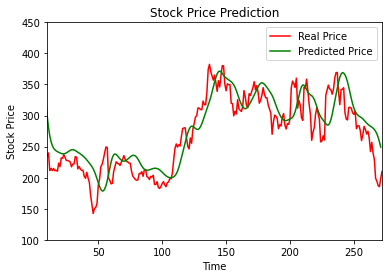

In [47]:
plt.matplotlib.pyplot.xlim(10,272)
plt.matplotlib.pyplot.ylim(100,450)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_stock_price, color ='green', label = 'Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()